### Variable Notes

- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')



In [13]:
df = pd.read_csv("./data/train.csv")

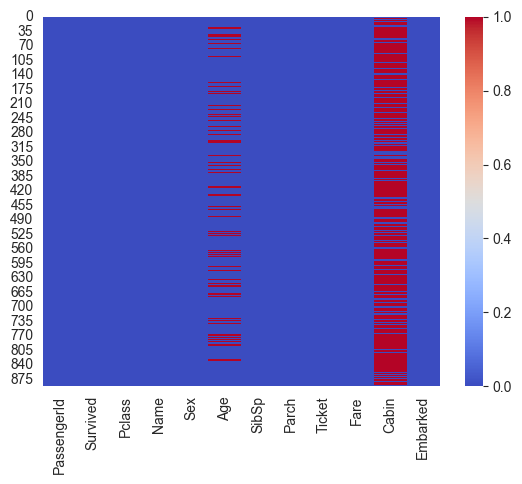

In [14]:
sns.heatmap(df.isna(), cmap="coolwarm");

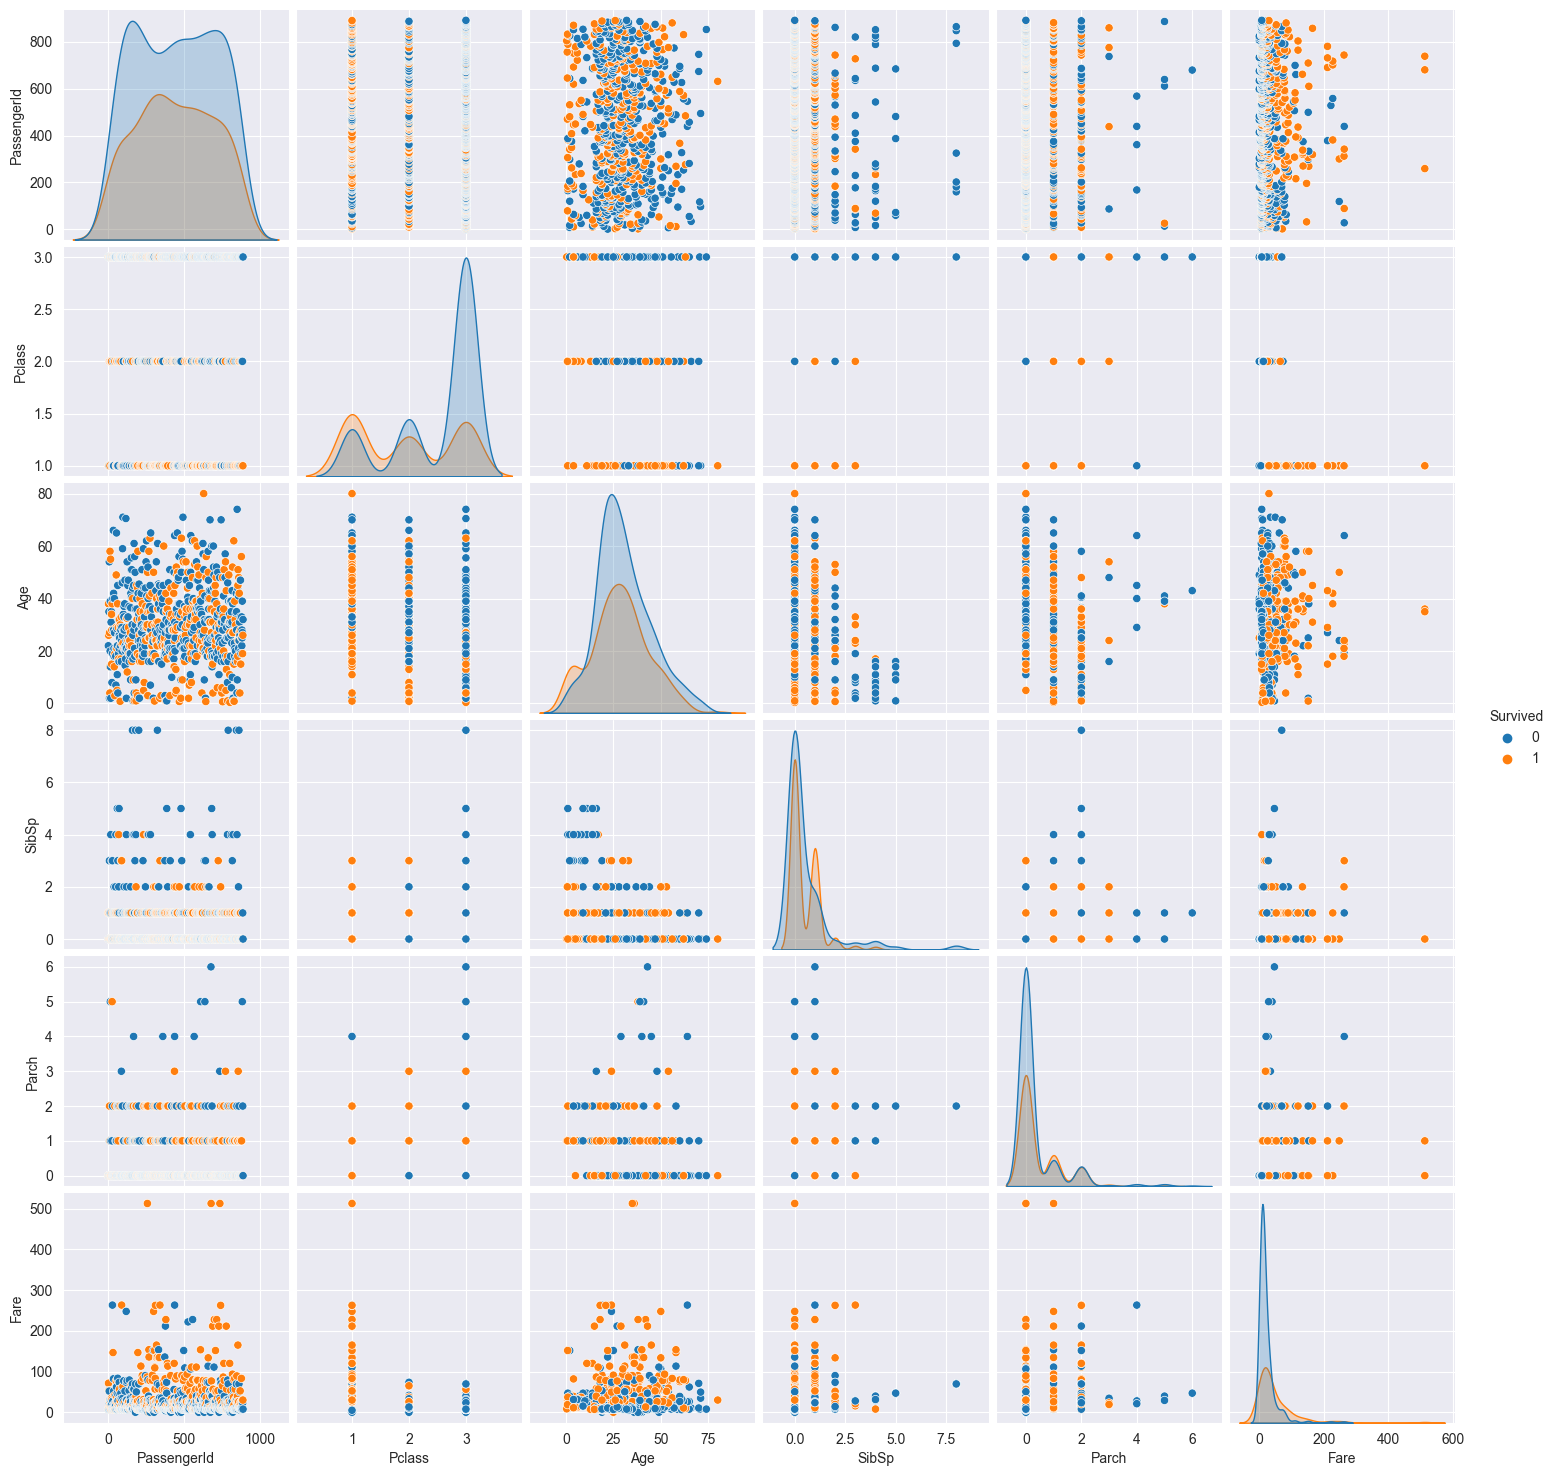

In [15]:
sns.pairplot(df, hue="Survived");

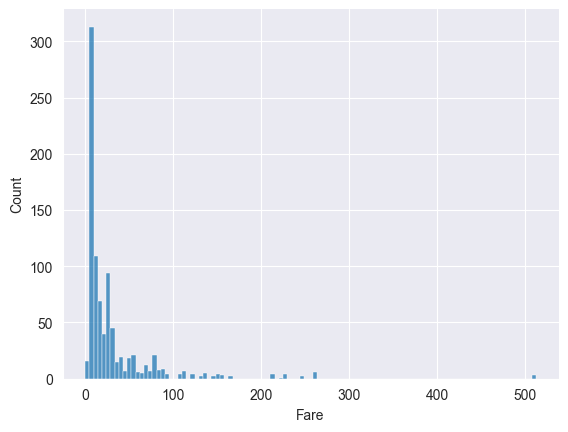

In [16]:
sns.histplot(data=df, x="Fare");
sns.despine()

In [17]:
df_new = df[["Survived", "Age", "SibSp", "Fare"]]

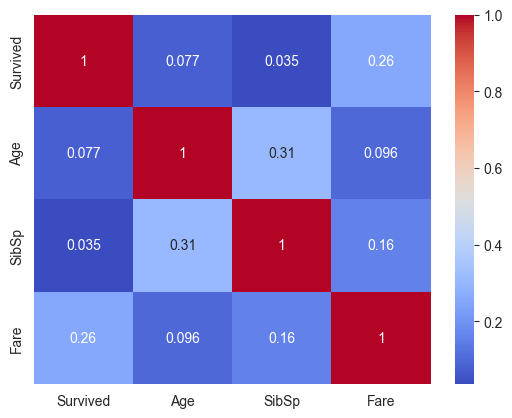

In [18]:
sns.heatmap(df_new.corr().abs(), annot=True, cmap="coolwarm");

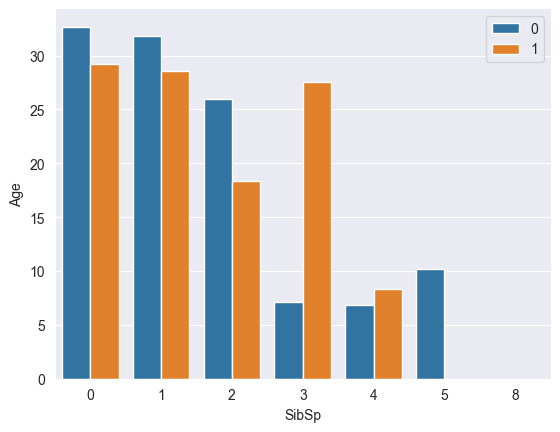

In [19]:
sns.barplot(data=df, x="SibSp", y="Age", hue="Survived",ci=None);
plt.legend(loc='upper right')
sns.despine()

In [20]:
df.groupby("Embarked")[["Survived"]].mean().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


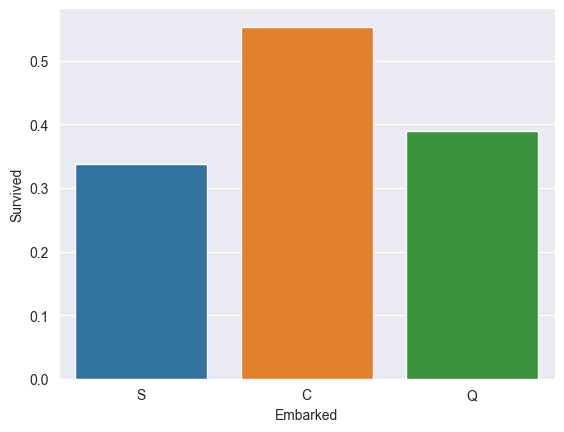

In [21]:
sns.barplot(x='Embarked',y='Survived', data=df, ci=None);
sns.despine()

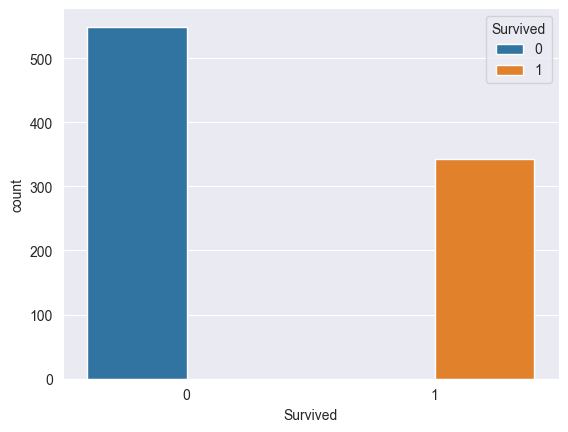

In [22]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.


sns.countplot(data=df, x="Survived", hue='Survived');
sns.despine()

In [24]:
#Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

surv_pass=df[(df["Survived"] == 1) & (df["Pclass"] == 1)]

In [25]:
class_pa=df[df["Pclass"]==1]

In [26]:
prop=len(surv_pass)/len(class_pa)
prop

0.6296296296296297

In [27]:
#Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

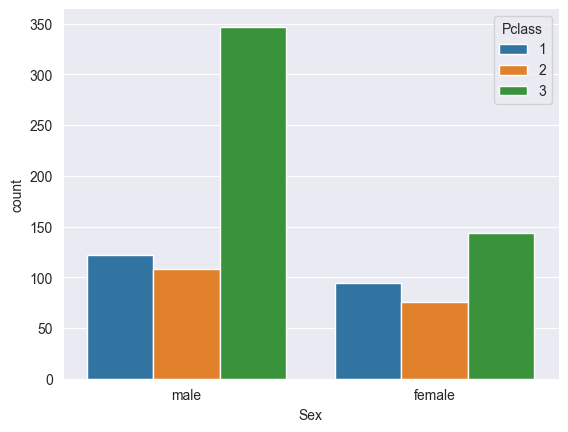

In [29]:
sns.countplot(data=df, x="Sex", hue='Pclass');
sns.despine()

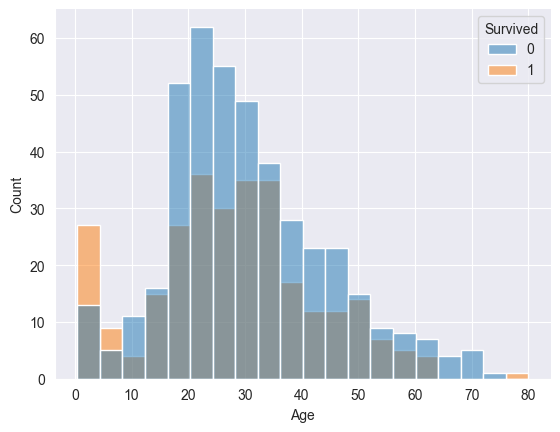

In [30]:
#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
sns.histplot(data=df, x="Age", hue="Survived");
sns.despine()

In [31]:
#Calculate the average age for survived and drowned passengers separately.
df.groupby("Survived")[["Age"]].mean()

,Age
Survived,
0,30.626179
1,28.343690


In [33]:
df["Age"].mean()

29.69911764705882

In [ ]:
#Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [38]:
df.groupby(["Survived", "Pclass", "Sex"]).size().unstack()

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47